# Quick test to make sure project has enough information

Disclaimer, used character research and no NLP tool

In [1]:
import io
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', None)

In [2]:
filepath = './data/BeerAdvocate/'

In [3]:
df = pd.read_csv(filepath + 'BeerAdvocateMerged.csv')

In [4]:
df.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers
1852328,Black Butte Porter,198,Deschutes Brewery,63,American Porter,5.2,1288954800,WJVII,wjvii.138887,4.0,4.0,3.5,4.50,4.00,4.15,Thanks to BA bud Cdkrenz for getting me this s...,395,395,1.179396e+09,"United States, Wisconsin",6100.0,1563.0,93.0,4.16,"United States, Oregon",431.0
1371554,Rocky Hop IPA,126971,Saw Works Brewing Company,27695,American IPA,6.0,1491472800,chinchill,chinchill.199175,3.5,3.5,4.0,3.75,3.75,3.70,12 oz can from Tennessee. Hazy amber-copper b...,5347,5199,1.204283e+09,"United States, South Carolina",49.0,9.0,81.0,3.46,"United States, Tennessee",16.0
196344,Santa's Little Helper 2010,63588,Mikkeller ApS,13307,Belgian Strong Dark Ale,10.9,1296990000,TheHoppiest,thehoppiest.364354,4.5,4.0,4.5,4.00,4.00,4.08,"Poured from a 750 ml bottle, plugged with a re...",618,592,1.251454e+09,"United States, Ohio",82.0,50.0,89.0,4.09,Denmark,795.0


# Data filtering and enrichment

In [5]:
# Create 3 different columns according to the rating info, "bottle", "can", "draft"

bottle = ['bottle', 'bottled', 'bottles']
can = ['can', 'canned', 'cans']
draft = ['draft', 'draught', 'tap', 'taps']
# Create different columns if review text contains the word
df['bottle'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in bottle))
df['can'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in can))
df['draft'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in draft))

In [6]:
# remove every row where columns bottle, can and draft are all False
df = df[df[['bottle', 'can', 'draft']].any(axis=1)]
display(df.sample(3))
print('We have {} valid reviews'.format(df.shape[0]))

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,bottle,can,draft
32982,Samuel Smith's Old Brewery Pale Ale (Organic),575,Samuel Smith Old Brewery (Tadcaster),113,English Pale Ale,5.0,1036580400,frank4sail,frank4sail.48,4.00,4.0,3.00,3.5,3.5,3.60,Fresh hop nose. Lasting slightly tan thick he...,505,501,9.847404e+08,"United States, New Jersey",1204.0,691.0,86.0,3.84,England,28.0,False,True,False
1360730,Wee Mac,52042,Sun King Brewing Company,20672,Scottish Ale,5.3,1381485600,BEERchitect,beerchitect.14442,3.25,3.5,3.25,3.5,3.5,3.46,American microbrewers are notorious in their t...,6778,6778,1.107947e+09,"United States, Kentucky",525.0,114.0,79.0,3.47,"United States, Indiana",229.0,False,True,False
1765288,Dark Horse Double Crooked Tree IPA,22381,Dark Horse Brewing Company,1471,American Double / Imperial IPA,12.0,1362654000,Stevedore,stevedore.703648,4.00,5.0,4.00,4.0,4.0,4.24,"(Note: personal system uses whole numbers, rou...",2917,2541,1.353064e+09,"United States, Wisconsin",2837.0,927.0,92.0,4.12,"United States, Michigan",258.0,True,True,True


We have 1197840 valid reviews


In [7]:
# remove every row with more than 1 true
df = df[df[['bottle', 'can', 'draft']].sum(axis=1) == 1]
display(df.sample(3))
print('We have {} valid reviews'.format(df.shape[0]))

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,bottle,can,draft
430228,Terrapin Hop Karma IPA,36195,Terrapin Beer Company,2372,American Brown Ale,6.0,1216807200,silver0rlead,silver0rlead.12306,4.0,4.0,4.5,4.5,4.5,4.35,Pours a nice mahogany color with a creamy tan ...,531,531,1.103886e+09,"United States, North Carolina",1009.0,544.0,88.0,3.92,"United States, Georgia",183.0,False,True,False
481456,A Little Sumpin' Wild,57912,Lagunitas Brewing Company,220,Belgian IPA,8.8,1314266400,DoctorDog,doctordog.250553,4.5,4.0,4.0,4.5,4.5,4.33,Presentation: 12 oz bottle into a tulip.*9.4% ...,486,450,1.221646e+09,"United States, Ohio",3536.0,939.0,92.0,4.10,"United States, California",278.0,True,False,False
1910110,Saint Arnold Divine Reserve #11,67612,Saint Arnold Brewing Company,337,American Double / Imperial IPA,8.9,1301479200,PhatAtUT,phatatut.355005,4.0,4.5,3.5,4.5,4.5,4.37,12oz bottle poured into snifter.A: orangish am...,1139,28,1.249034e+09,"United States, Texas",220.0,124.0,92.0,4.21,"United States, Texas",129.0,True,False,False


We have 939088 valid reviews


In [8]:
#create a new column with the serving type
df['serving_type'] = df[['bottle', 'can', 'draft']].idxmax(axis=1)

# drop the columns bottle, can and draft
df.drop(['bottle', 'can', 'draft'], axis=1, inplace=True)

df.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,serving_type
1115777,White Rascal,9689,Avery Brewing Company,30,Witbier,5.6,1072609200,HardTarget,hardtarget.1712,4.0,4.5,3.0,4.0,4.0,4.02,"Standard brown bottle with no date, but pourin...",1379,1379,1.047121e+09,"United States, Texas",2481.0,775.0,83.0,3.68,"United States, Colorado",306.0,bottle
555643,Estate Homegrown Wet Hop Ale,62328,Sierra Nevada Brewing Co.,140,American IPA,6.7,1297681200,ebrauser,ebrauser.506184,4.0,4.5,4.5,4.0,4.5,4.27,Poured from a bomber to a pint glassAppearane:...,111,101,1.285150e+09,"United States, Utah",1433.0,556.0,91.0,4.10,"United States, California",574.0,can
424676,Sweetwater Exodus Porter,1494,SweetWater Brewing Company,273,American Porter,5.9,1339322400,Cresant,cresant.76084,3.0,3.0,3.0,3.0,3.0,3.00,Served this 12 oz. brown bottle in a Guinness ...,1074,1014,1.145959e+09,"United States, Kentucky",350.0,133.0,84.0,3.74,"United States, Georgia",135.0,bottle


In [9]:
# print the number of reviews for each serving type
df['serving_type'].value_counts(normalize=False)

serving_type
bottle    479777
can       344842
draft     114469
Name: count, dtype: int64

In [10]:
# compute the number of valid reviews per user
df['user_nbr_reviews_computed'] = df.groupby('user_id')['user_id'].transform('count')

# compute the number of valid reviews per beer
df['beer_nbr_reviews_computed'] = df.groupby('beer_id')['beer_id'].transform('count')

# compute the avg rating per beer
df['beer_avg_computed'] = df.groupby('beer_id')['rating'].transform('mean')

df.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,serving_type,user_nbr_reviews_computed,beer_nbr_reviews_computed,beer_avg_computed
497570,Lagunitas Sucks (Brown Shugga Substitute Ale),74986,Lagunitas Brewing Company,220,American Double / Imperial IPA,7.85,1358420400,TeeJay,teejay.711922,3.50,4.25,4.5,4.00,4.00,4.08,Bold Tight Crisp Right to the point for this l...,15,4,1.357556e+09,"United States, Tennessee",10249.0,1614.0,96.0,4.31,"United States, California",278.0,can,2,628,4.304172
626741,Highway 128 Session Series: Blood Orange Gose,132073,Anderson Valley Brewing Company,193,Gose,4.20,1420369200,DIM,dim.100299,3.75,3.25,4.0,3.75,3.75,3.66,"This was a hazy orange tinted golden color, it...",1551,1551,1.159438e+09,"United States, Pennsylvania",1792.0,261.0,88.0,3.93,"United States, California",94.0,can,447,110,3.921636
920738,Kamikaze IPA,73485,Iron Hill Brewery & Restaurant,6045,American IPA,7.00,1317031200,sholland119,sholland119.38560,4.50,4.00,4.0,4.50,4.50,4.33,"On tap at West Chester location, 9/17/11.A-Pou...",1264,1046,1.126174e+09,"United States, Pennsylvania",10.0,4.0,85.0,3.93,"United States</a> | <a href=""http://maps.googl...",730.0,draft,341,1,4.330000


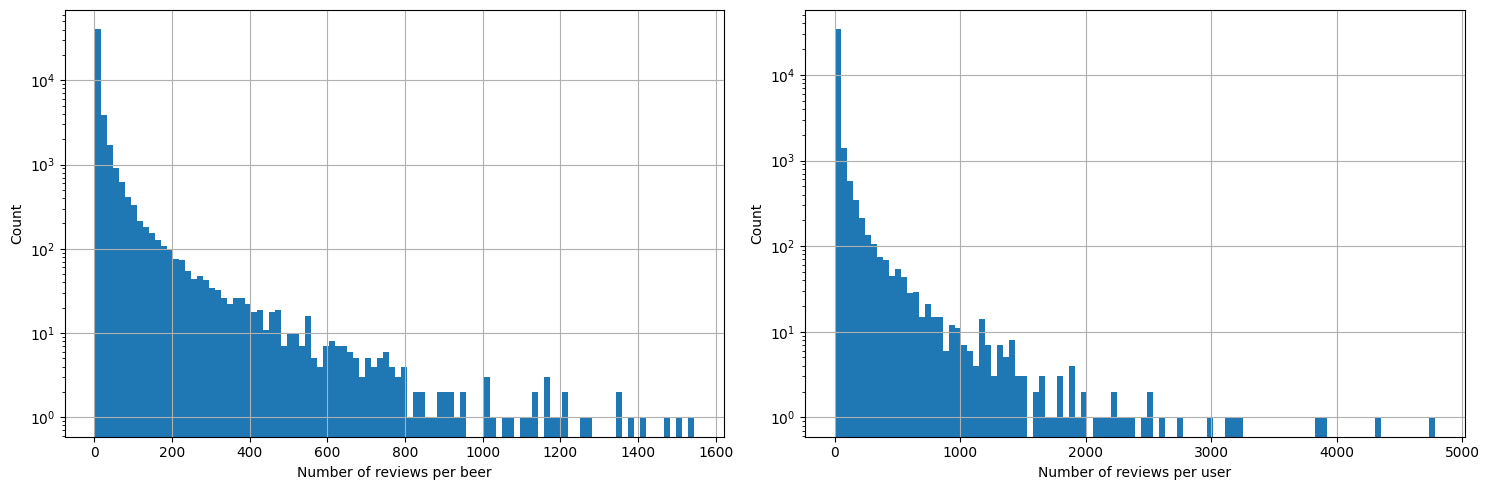

In [23]:
plt.figure(figsize=(15, 5))

# group the reviews by beer_id and show a histogram of the number of reviews computed
plt.subplot(1, 2, 1)
df.groupby('beer_id')['beer_nbr_reviews_computed'].mean().hist(bins=100, log=True)
plt.xlabel('Number of reviews per beer')
plt.ylabel('Count')

# group the reviews by user_id and show a histogram of the number of reviews computed
plt.subplot(1, 2, 2)
df.groupby('user_id')['user_nbr_reviews_computed'].mean().hist(bins=100, figsize=(15, 5), log=True)
plt.xlabel('Number of reviews per user')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
#Filtering to remove users and beers with less reviews

min_nbr_reviews_per_user = 10
min_nbr_reviews_per_beer = 20

len0 = df.shape[0]

# remove every row where the number of reviews per user is less than min_nbr_reviews_per_user
df_filter = df[df['user_nbr_reviews_computed'] >= min_nbr_reviews_per_user]

# remove every row where the number of reviews per beer is less than min_nbr_reviews_per_beer
df_filter_full = df_filter[df_filter['beer_nbr_reviews_computed'] >= min_nbr_reviews_per_beer]

print('We removed {} rows, leaving us with {} %% of the original dataset'.format(len0 - df_filter_full.shape[0], round(df_filter_full.shape[0] / len0 * 100, 2)))
print('We have {} valid reviews'.format(df_filter_full.shape[0]))

# print the number of reviews for each serving type
df_filter_full['serving_type'].value_counts(normalize=False)

We removed 259148 rows, leaving us with 72.4 %% of the original dataset
We have 679940 valid reviews


serving_type
bottle    368770
can       245706
draft      65464
Name: count, dtype: int64

# Visualization

In [26]:
df = df_filter_full.copy()

In [27]:
# print some reviews for each serving type
print('Reviews with bottle:\n')
for text in df[df['serving_type'] == 'bottle']['text'].sample(3):
    print(text)
    print('----------------------')
print('Reviews with can:\n')
for text in df[df['serving_type'] == 'can']['text'].sample(3):
    print(text)
    print('----------------------')
print('Reviews with draft:\n')
for text in df[df['serving_type'] == 'draft']['text'].sample(3):
    print(text)
    print('----------------------')

Reviews with bottle:

Poured a nice dark amber color with a one finger caramel brown head with traces of lacing. Loved the smell of this winter warmer while pouring into a slightly frosted mug. Tasted a hint of citrus in the hops and other spices that my palate couldn't differentiate. Excellent mouthfeel and after taste. This is one of my favorite winter warmers. This review based on my fourth bottle of the my original six pack.
----------------------
Poured from a 650ml bottle into my Hoppin' Frog pint glass. No bottled on date, but it was refrigerated (thank God) in the store where I bought it...A - Pours a hazy golden color. Did not give it a hard pour, but a 2.5 finger eggshell (slightly off white) white color head did form.S - Honey, mango, grapefruit, some pineapple. VERY citrus hop presence. However not as strong an aroma as I would have thought for all that is going on here.T - Honey and very citrusy hops stand out. It is sweet and bitter at the same time with neither overpower

In [30]:
# print the average value of the rating for each serving type
comp_str = 'rating'
print('Average ' + comp_str + ' for bottle: ', round(df[df['serving_type'] == 'bottle'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for can: ', round(df[df['serving_type'] == 'can'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for draft: ', round(df[df['serving_type'] == 'draft'][comp_str].mean(), 3))

Average rating for bottle:  3.856
Average rating for can:  3.811
Average rating for draft:  3.891


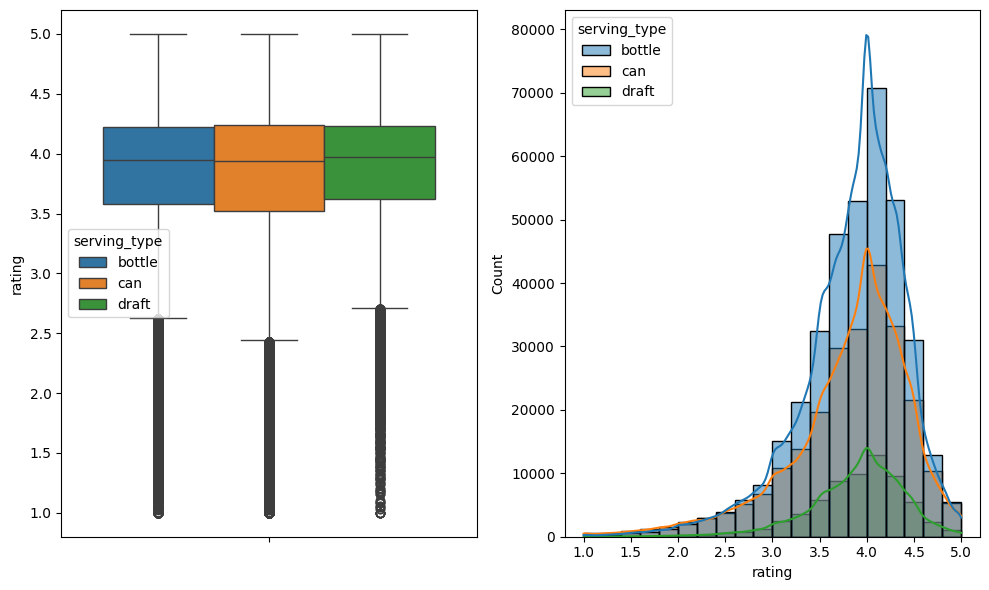

In [29]:
# show boxplot of ratings for bottle, can and draft
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(data=df, hue='serving_type', y='rating')
plt.subplot(122)
sns.histplot(data=df, hue='serving_type', x='rating', kde=True, bins=20)
plt.tight_layout()
plt.show()

# Statistical Analysis

In [31]:
def do_ttest(type1, type2, category):
    ttest = ttest_ind(df[df['serving_type'] == type1][category],df[df['serving_type'] == type2][category])
    if ttest[1] > 0.05:
        print('The p-value is high (' + str(ttest[1]) + '), so we cannot reject the null hypothesis that the two samples have the same average')
    else:
        print('The p-value is very low (' + str(ttest[1]) + '), so we can reject the null hypothesis that the two samples have the same average')

In [33]:
for i in range(9, 15):
    print('T-test between can and draft for column ' + df.columns[i] + ':')
    do_ttest('can', 'draft', df.columns[i])
    print('----------------------')

T-test between can and draft for column appearance:
The p-value is very low (6.744761688089629e-86), so we can reject the null hypothesis that the two samples have the same average
----------------------
T-test between can and draft for column aroma:
The p-value is very low (1.5501954227823162e-63), so we can reject the null hypothesis that the two samples have the same average
----------------------
T-test between can and draft for column palate:
The p-value is very low (1.3887768825514842e-165), so we can reject the null hypothesis that the two samples have the same average
----------------------
T-test between can and draft for column taste:
The p-value is very low (1.7393936614722135e-212), so we can reject the null hypothesis that the two samples have the same average
----------------------
T-test between can and draft for column overall:
The p-value is very low (2.245541778889635e-190), so we can reject the null hypothesis that the two samples have the same average
--------------